<a href="https://colab.research.google.com/github/sa96102/Python_exam/blob/master/TorchVision_Keypoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torchvision
!pip install torchtext -U

     |████████████████████████████████| 81kB 1.3MB/s 
     |████████████████████████████████| 1.0MB 3.4MB/s 
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import torch
import torchvision
from torchvision import models
import torchvision.transforms as T

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

print('pytorch', torch.__version__)
print('torchvision', torchvision.__version__)

pytorch 1.4.0
torchvision 0.5.0


In [0]:
IMG_SIZE = 480 # resize 크기.
THRESHOLD = 0.95 # 사람이라고 판단하는 임계값. 95% 이상이면 사람이라고 판단.

### Download Model

In [6]:
model = models.detection.keypointrcnn_resnet50_fpn(pretrained=True).eval() # fpn_Feature Pyramid Network(Object Detection)

Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth" to /root/.cache/torch/checkpoints/keypointrcnn_resnet50_fpn_coco-fc266e95.pth


### Load Image

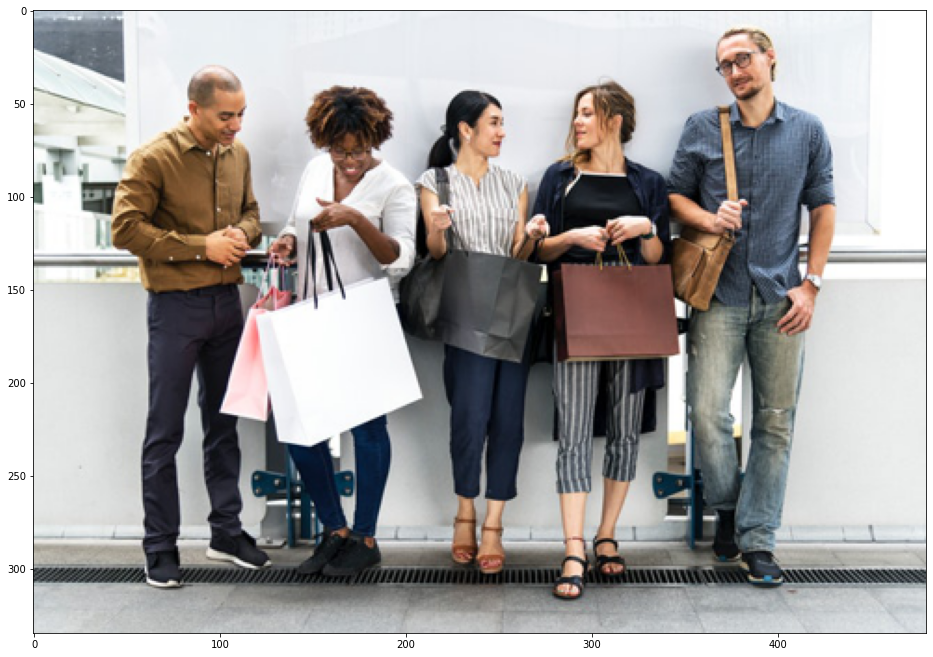

In [7]:
img = Image.open('/content/drive/My Drive/Colab Notebooks/Python_exam/Data/torchvision/07.jpg')
img = img.resize((IMG_SIZE, int(img.height * IMG_SIZE / img.width)))

plt.figure(figsize=(16, 16))
plt.imshow(img)

### Image to Tensor

In [8]:
trf = T.Compose([
    T.ToTensor()
]) # T.Compose([])_여러 개의 트랜스폼 방법을 묶어 차례로 수행. T.ToTensor()_이미지를 0~1사이의 값을 가지는 텐서로 변환.

input_img = trf(img)

print(input_img.shape) # 채널, 세로, 가로 순으로 출력.

torch.Size([3, 335, 480])


### Inference

In [9]:
out = model([input_img])[0]

print(out.keys()) # boxes_bounding box 영역(x0, y0, x1, y1). scores_사람이라고 판단한 점수. 높을수록 사람일 확률 증가. keypoints_사람이라고 판단할 수 있는 부분.

dict_keys(['boxes', 'labels', 'scores', 'keypoints', 'keypoints_scores'])


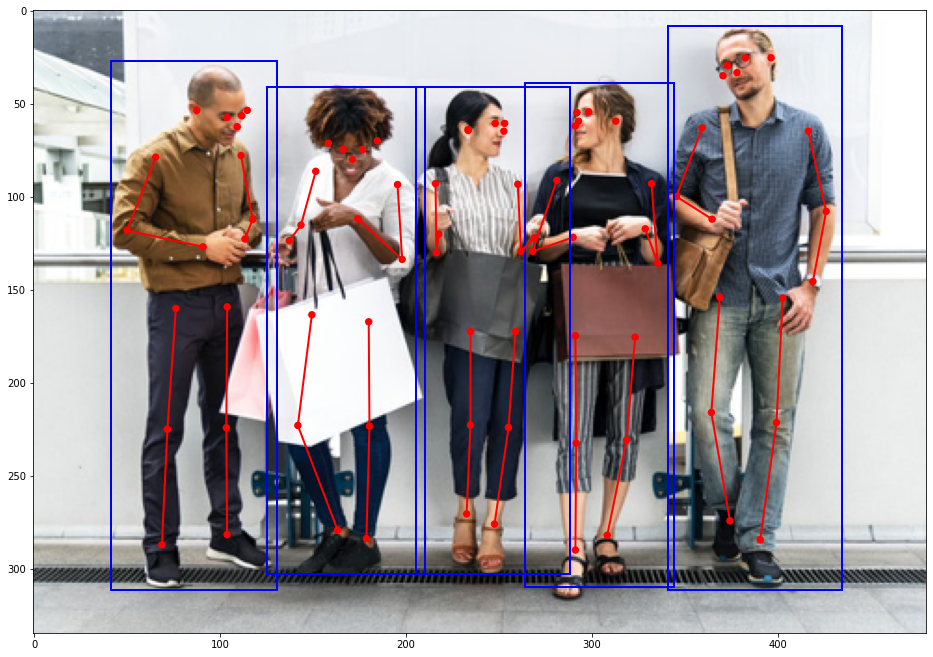

In [10]:
codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO
]

fig, ax = plt.subplots(1, figsize=(16, 16))
ax.imshow(img)

for box, score, keypoints in zip(out['boxes'], out['scores'], out['keypoints']):
    score = score.detach().numpy() # tensor.detach()_그래프에서 텐서를 분리. tensor.numpy()_텐서를 numpy 배열로 변환.

    if score < THRESHOLD:
        continue # 0.95보다 낮은 점수를 가지고 있는 box는 제외.

    box = box.detach().numpy()
    keypoints = keypoints.detach().numpy()[:, :2] # visibility는 제외하고 x, y 좌표값만 사용.
    # keypoint는 [N, K, 3]의 배열을 가짐. N은 사람일 가능성이 있는 bounding box의 개수, K는 키포인트의 개수(17개), 3은 [x, y, visibility]. 키포인트가 몸이나 사물 등에 가려 안보이는 경우 visibility = 0.

    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor='b', facecolor='none') # x0, y0, width, height 순.
    ax.add_patch(rect)

    # 17 points
    for k in keypoints:
        circle = patches.Circle((k[0], k[1]), radius=2, facecolor='r')
        ax.add_patch(circle)

    # Draw path
    # Left Arm
    path = Path(keypoints[5:10:2], codes)
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')
    ax.add_patch(line)

    # Right Arm
    path = Path(keypoints[6:11:2], codes)
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')
    ax.add_patch(line)

    # Left Leg
    path = Path(keypoints[11:16:2], codes)
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')
    ax.add_patch(line)

    # Right Leg
    path = Path(keypoints[12:17:2], codes)
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')
    ax.add_patch(line)